<a href="https://colab.research.google.com/github/VikasAmlaha/superstore-sales-anlalysis/blob/main/Superstore_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superstore Sales Data Analysitcs
In this project we will work on the below mentioned aspects of sales dataset from a superstore taken from Kaggle

- Superstore Customer Segmentation

- Revenue by Customer Segment

- Customers Sales Insights

- Exploring Customer Loyalty at Superstores

- Superstore Shipping Strategies

- Geographic Market Analysis

- Product Performance Insights

- Comprehensive Sales Analysis

- Tracking Sales Trends

- Visualizing Sales by State

## Import all the necessary libraries

In [14]:
# To import all the necessary libraries needed for our data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data, preprocessing it and cleaning it for analysis

In [15]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='cp1252')
df.head()
df.info()

if df.duplicated().sum()>0:
  print("There are duplicates")
else:
  print("There are no duplicates")

customer_types = df['Segment'].unique()
print(customer_types)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Customer Segmentation

In [16]:
# to count number of customers in each customer type
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns = {'Segment' : 'Type of Customers'})
print(number_of_customers)


  Type of Customers  count
0          Consumer   5191
1         Corporate   3020
2       Home Office   1783


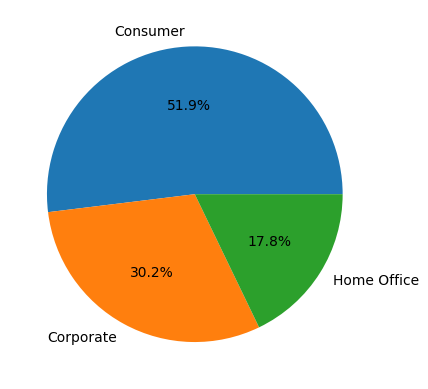

In [17]:
plt.pie(number_of_customers['count'], labels = number_of_customers['Type of Customers'], autopct='%1.1f%%') # Changed 'type of customers' to 'Type of Customers' to match the actual column name.
plt.show()

## Total sales in each segment

  Type of Customer   Total Sales
0         Consumer  1.161401e+06
1        Corporate  7.061464e+05
2      Home Office  4.296531e+05


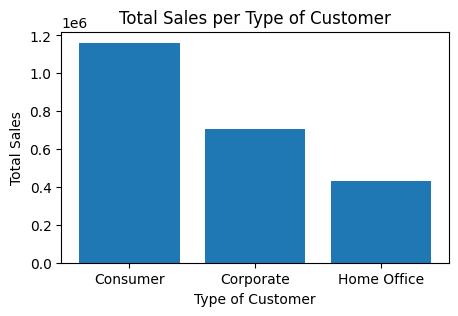

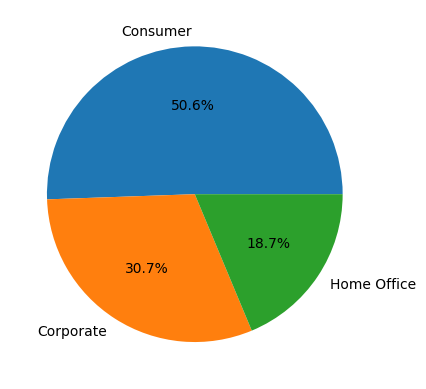

In [18]:
# to find out total sales in each segment
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns = {'Segment': 'Type of Customer', 'Sales' : 'Total Sales'})
print(sales_per_segment)
# to plot bar graph
plt.figure(figsize=(5, 3))
plt.bar(sales_per_segment['Type of Customer'], sales_per_segment['Total Sales'])
plt.xlabel('Type of Customer')
plt.ylabel('Total Sales')
plt.title('Total Sales per Type of Customer')
plt.show()
print('\n')
# to draw a pie chart of sales per type of customers
plt.pie(sales_per_segment['Total Sales'], labels = sales_per_segment['Type of Customer'], autopct='%1.1f%%')
plt.show()

##📈 What is CLTV (Customer Lifetime Value)?
CLTV stands for Customer Lifetime Value.

It is a business metric that estimates the total revenue or profit a company can expect from a customer over the entire duration of their relationship.

#🔢 Formula (Simple Version):
$$
CLTV = Average Purchase Value × Purchase Frequency × Customer Lifespan
$$
📊 Components:
$$
Average Purchase Value = Total Revenue / Number of Purchases
$$
$$
Purchase Frequency = Number of Purchases / Number of Unique Customers
$$
Customer Lifespan = How long (in months or years) a typical customer keeps buying from you

#✅ Why CLTV Matters:

* Helps businesses decide how much to spend on acquiring new customers

* Identifies high-value customers

* Optimizes marketing and retention strategies

* Improves profit forecasting

#💡 Example:
If a customer buys ₹1,000 worth of products every month and continues for 2 years:
$$
CLTV = ₹1,000 × 12 × 2 = ₹24,000
$$
That’s how much that customer is worth over their "lifetime" with your business.

# 🧠 Lesson: Customer Loyalty Analysis Using RFM

---

## 🎯 Objective
The goal of this analysis is to evaluate customer loyalty using the **RFM model** — which stands for **Recency, Frequency, and Monetary** value. It helps identify valuable customer segments and design targeted marketing or retention strategies.

---

## 📘 What is RFM?

**RFM** is a customer behavior analysis technique based on:

- **Recency (R):** How recently a customer made a purchase.
- **Frequency (F):** How often a customer makes a purchase.
- **Monetary (M):** How much money a customer spends.

Each component provides insight into how loyal or valuable a customer is to a business.

---

## 🔍 Why RFM is Important

- Identifies **loyal and high-value customers**.
- Detects **inactive or lost customers**.
- Enables **personalized and targeted marketing**.
- Supports **customer retention strategies**.
- Improves **decision-making** for sales and marketing.

---

## 🛠️ RFM Analysis Process

### 1. **Data Preparation**
- Clean the dataset and convert transaction dates into proper datetime format.
- Ensure key fields are available: `CustomerID`, `TransactionDate`, and `PurchaseAmount`.

### 2. **Calculate RFM Metrics**
- **Recency:** Number of days since a customer's last purchase.
- **Frequency:** Total number of purchases by the customer.
- **Monetary:** Total amount the customer has spent.

### 3. **Score Customers**
- Assign each customer a score (e.g., 1 to 4) for **Recency**, **Frequency**, and **Monetary**.
- Combine these into a three-digit **RFM score** like `444`, `321`, etc.

### 4. **Customer Segmentation**
Use the RFM scores to create meaningful customer segments such as:

| Segment             | Description                                              |
|---------------------|----------------------------------------------------------|
| Champions           | Recent, frequent, high spenders                          |
| Loyal Customers     | Frequent and high spenders                               |
| Potential Loyalists | Recent but not very frequent or high spenders            |
| At Risk             | High spenders who haven’t purchased in a while           |
| Lost                | Haven’t purchased in a long time                         |

### 5. **Visualize and Interpret**
- Use bar charts or pie charts to visualize segment distribution.
- Analyze segment behavior to design targeted actions (e.g., reactivation, reward programs, upselling).

---

## 💡 Key Takeaways

- RFM is a **simple but powerful tool** for understanding customer behavior.
- It helps **prioritize resources** and personalize **marketing efforts**.
- Useful across industries like e-commerce, retail, banking, and more.
- Enables data-driven **customer engagement and retention strategies**.

---



## Customer loyalty by total orders

In [19]:
# To analyze customer loyalty by total orders
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customer_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >= 1]
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)
print(repeat_customers_sorted.head(15).reset_index(drop = True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            37
1     MA-17560         Matt Abelman  Home Office            34
2     JL-15835             John Lee     Consumer            34
3     PP-18955           Paul Prost  Home Office            34
4     EH-13765         Edward Hooks    Corporate            32
5     JD-15895     Jonathan Doherty    Corporate            32
6     SV-20365          Seth Vernon     Consumer            32
7     CK-12205  Chloris Kastensmidt     Consumer            32
8     AP-10915       Arthur Prichep     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    ZC-21910     Zuschuss Carroll     Consumer            31
11    LC-16870        Lena Cacioppo     Consumer            30
12    SH-19975        Sally Hughsby    Corporate            29
13    GT-14710            Greg Tran     Consumer            29
14    KL-16645         Ken Lonsdale     Consumer       

## To find out customers who spent most

In [20]:
# to find out customers who spent most
customer_spent = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
customer_spent_sorted = customer_spent.sort_values(by='Sales', ascending=False)

print(customer_spent_sorted.head(15).reset_index(drop = True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120
12    BM-11140        Becky Martin     Consumer  11789.630
13    SV-20365         Seth Vernon     Consumer  11470.950
14    CJ-12010     Caroline Jumper     Consumer  11164.974


## To find out most liked and reliable shipping method

  Mode of Shipment  Use Frequency
0   Standard Class           5968
1     Second Class           1945
2      First Class           1538
3         Same Day            543


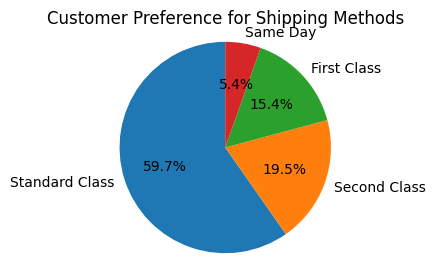

In [21]:
# Count how many times each Ship Mode is used
shipping_model = df['Ship Mode'].value_counts().reset_index()

# Rename columns properly
shipping_model.columns = ['Mode of Shipment', 'Use Frequency']

# Display the DataFrame
print(shipping_model)

# Plot the pie chart
plt.figure(figsize=(3, 3))
plt.pie(
    shipping_model['Use Frequency'],
    labels=shipping_model['Mode of Shipment'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Customer Preference for Shipping Methods')
plt.axis('equal')  # Makes it a perfect circle
plt.show()


## To find out number of Customers in each state

In [22]:
# to find out number of customers in each state
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index': 'State','State':'Number of Customers'})
print(state.head(10))

  Number of Customers  count
0          California   2001
1            New York   1128
2               Texas    985
3        Pennsylvania    587
4          Washington    506
5            Illinois    492
6                Ohio    469
7             Florida    383
8            Michigan    255
9      North Carolina    249


## To find out each city customer count

In [23]:
city = df['City'].value_counts().reset_index()
city.columns = ['City', 'Number of Customers']
print(city.head(10))

            City  Number of Customers
0  New York City                  915
1    Los Angeles                  747
2   Philadelphia                  537
3  San Francisco                  510
4        Seattle                  428
5        Houston                  377
6        Chicago                  314
7       Columbus                  222
8      San Diego                  170
9    Springfield                  163


## To find out total amount of sales from each state

In [24]:
state_total_sales = df.groupby(['State'])['Sales'].sum().reset_index()
state_total_sales = state_total_sales.sort_values(by='Sales', ascending=False)
state_total_sales.columns = ['State', 'Total Sales']
print(state_total_sales.head(10).reset_index(drop=True))



          State  Total Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140
5       Florida   89473.7080
6      Illinois   80166.1010
7          Ohio   78258.1360
8      Michigan   76269.6140
9      Virginia   70636.7200


## To find out Total Sales in each city




In [25]:
total_sales_city = df.groupby(['City'])['Sales'].sum().reset_index()
total_sales_city = total_sales_city.sort_values(by='Sales', ascending=False)
total_sales_city.columns = ['City', 'Total Sales']
print(total_sales_city.head(10).reset_index(drop=True))

            City  Total Sales
0  New York City  256368.1610
1    Los Angeles  175851.3410
2        Seattle  119540.7420
3  San Francisco  112669.0920
4   Philadelphia  109077.0130
5        Houston   64504.7604
6        Chicago   48539.5410
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9    Springfield   43054.3420


## Products category

In [28]:
products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


# To find Products sub category

In [29]:
# to find subcategories
sub_category = df['Sub-Category'].unique()
print(sub_category)
# to find total number of sub categories
print(len(sub_category))

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
17


# To find out number of subcategroies in each category

In [30]:
subcategory_count = df.groupby(['Category'])['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)

print(subcategory_count.reset_index(drop=True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


# to find total sales in each subcategory

In [31]:
# to find total sales in each subcategory
subcategory_count_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=False)
print(subcategory_count_sales.reset_index(drop=True))

           Category Sub-Category        Sales
0        Technology       Phones  330007.0540
1         Furniture       Chairs  328449.1030
2   Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
4   Office Supplies      Binders  203412.7330
5        Technology     Machines  189238.6310
6        Technology  Accessories  167380.3180
7        Technology      Copiers  149528.0300
8         Furniture    Bookcases  114879.9963
9   Office Supplies   Appliances  107532.1610
10        Furniture  Furnishings   91705.1640
11  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
13  Office Supplies          Art   27118.7920
14  Office Supplies    Envelopes   16476.4020
15  Office Supplies       Labels   12486.3120
16  Office Supplies    Fasteners    3024.2800


# To create a bar chart for subcategory sales

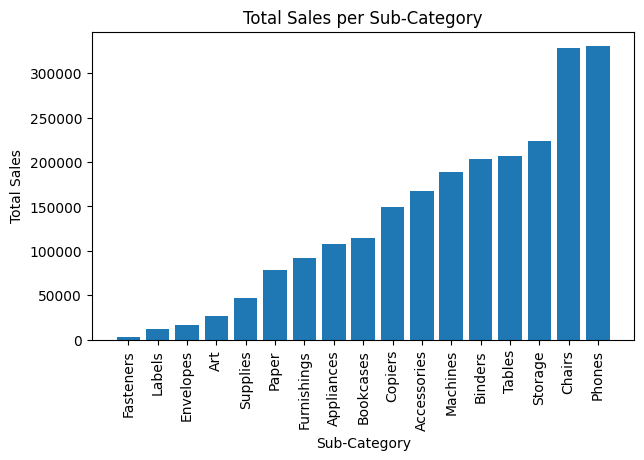

In [32]:
# bar chart for subcategory sales
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=True)
plt.figure(figsize=(7,4))
plt.bar(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'])
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Sub-Category')
plt.xticks(rotation=90)
plt.show()

# To find out total sales in each category

          Category        Sales
0       Technology  836154.0330
1        Furniture  741999.7953
2  Office Supplies  719047.0320


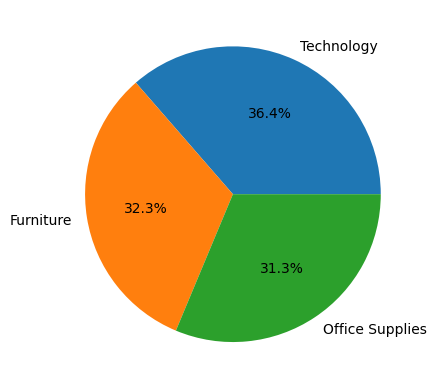

In [33]:
# To find total sales in each category
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()
category_sales = category_sales.sort_values(by='Sales', ascending=False)
print(category_sales.reset_index(drop=True))

# creating a pie chart for the same
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%')
plt.show()

# Top performing products

In [34]:
top_performing_product = df.groupby(['Product Name'])['Sales'].sum().reset_index()
top_performing_product = top_performing_product.sort_values(by='Sales', ascending=False)
print(top_performing_product.head(10).reset_index(drop=True))

                                        Product Name      Sales
0              Canon imageCLASS 2200 Advanced Copier  61599.824
1  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
2  Cisco TelePresence System EX90 Videoconferenci...  22638.480
3       HON 5400 Series Task Chairs for Big and Tall  21870.576
4         GBC DocuBind TL300 Electric Binding System  19823.479
5   GBC Ibimaster 500 Manual ProClick Binding System  19024.500
6               Hewlett Packard LaserJet 3310 Copier  18839.686
7  HP Designjet T520 Inkjet Large Format Printer ...  18374.895
8          GBC DocuBind P400 Electric Binding System  17965.068
9        High Speed Automatic Electric Letter Opener  17030.312


# To find out yearly sales

   Year  Total Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552


<BarContainer object of 4 artists>

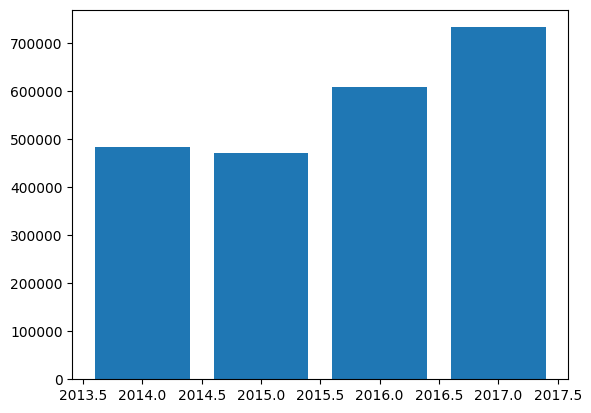

In [35]:
# To find out yearly sales
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales = yearly_sales.reset_index()
yearly_sales.columns = ['Year', 'Total Sales']
print(yearly_sales)

# To plot a bar graph for yearly sales
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])


# To Plot a line plot


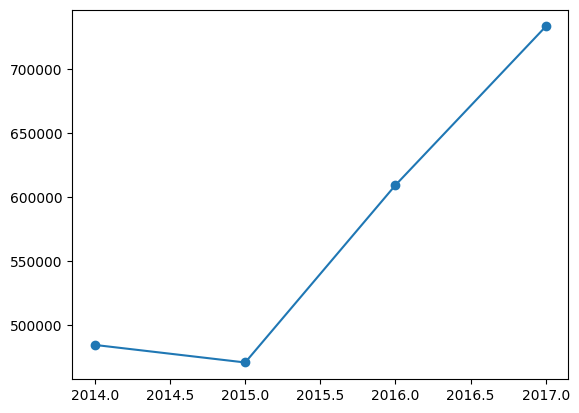

In [36]:
# to plot a line plot
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle = '-')



# To find out quarterly sales

     Quarter  Total Sales
0 2017-03-31  123144.8602
1 2017-06-30  133764.3720
2 2017-09-30  196251.9560
3 2017-12-31  280054.0670


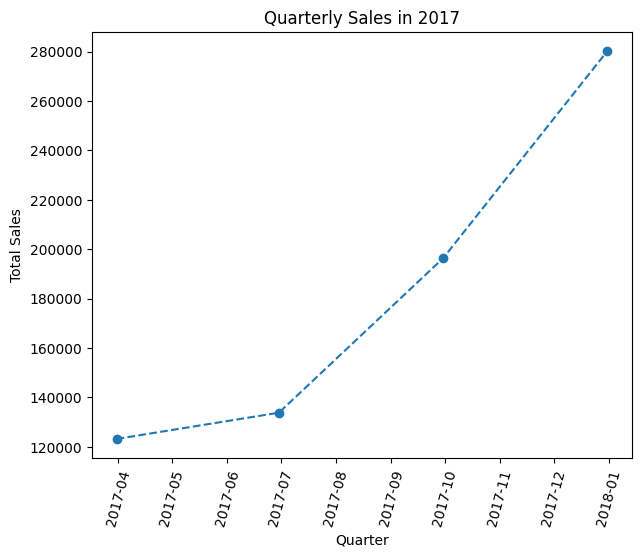

In [37]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%y/%m/%d')

# Filter data for the year 2017
year_sales = df[df['Order Date'].dt.year == 2017]

# Resample quarterly based on Order Date
quarterly_sales = year_sales.resample('QE', on='Order Date')['Sales'].sum()

# Reset index and rename columns
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date': 'Quarter', 'Sales': 'Total Sales'})

print(quarterly_sales)

# to plot a line graph

plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o', linestyle='--')
plt.tight_layout()
plt.xticks(rotation=75)
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Quarterly Sales in 2017')
plt.show()


# To find out monthly sales in 2017

        Month  Total Monthly Sales
0  2017-01-31           43971.3740
1  2017-02-28           20301.1334
2  2017-03-31           58872.3528
3  2017-04-30           36521.5361
4  2017-05-31           44261.1102
5  2017-06-30           52981.7257
6  2017-07-31           45264.4160
7  2017-08-31           63120.8880
8  2017-09-30           87866.6520
9  2017-10-31           77776.9232
10 2017-11-30          118447.8250
11 2017-12-31           83829.3188


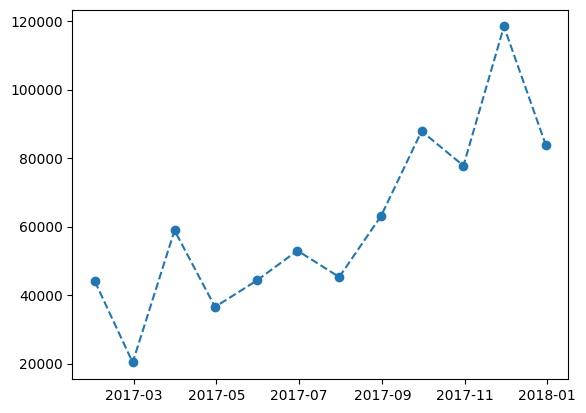

In [38]:
# To find out monthly sales in 2017
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df[df['Order Date'].dt.year == 2017].resample('ME', on='Order Date')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()
# The 'Order Date' column is likely the index after resampling, so we rename it
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month', 'Sales': 'Total Monthly Sales'}) # Changed this line
print(monthly_sales)

# To plot a line graph for the same
plt.plot(monthly_sales['Month'], monthly_sales['Total Monthly Sales'], marker='o', linestyle='--')
plt.show() # Added this line to explicitly show the plot

# Map for sales per state

In [39]:
# libraries that will needed for mapping
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# initialize plotly in colab
import plotly.io as pio
# create a mapping for all 50 states
all_state_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

# Add the Abbreviation column to the DataFrame
df['Abbreviation'] = df['State'].map(all_state_mapping)

# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add Abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

# Create a choropleth map using Plotly
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    locationmode='USA-states',
    z=sum_of_sales['Sales'],
    hoverinfo='location+z',
    showscale=True
))

fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope='usa',
    title='Total Sales by U.S. State'
)

fig.show()

## Creating a bar graph for sales for each state

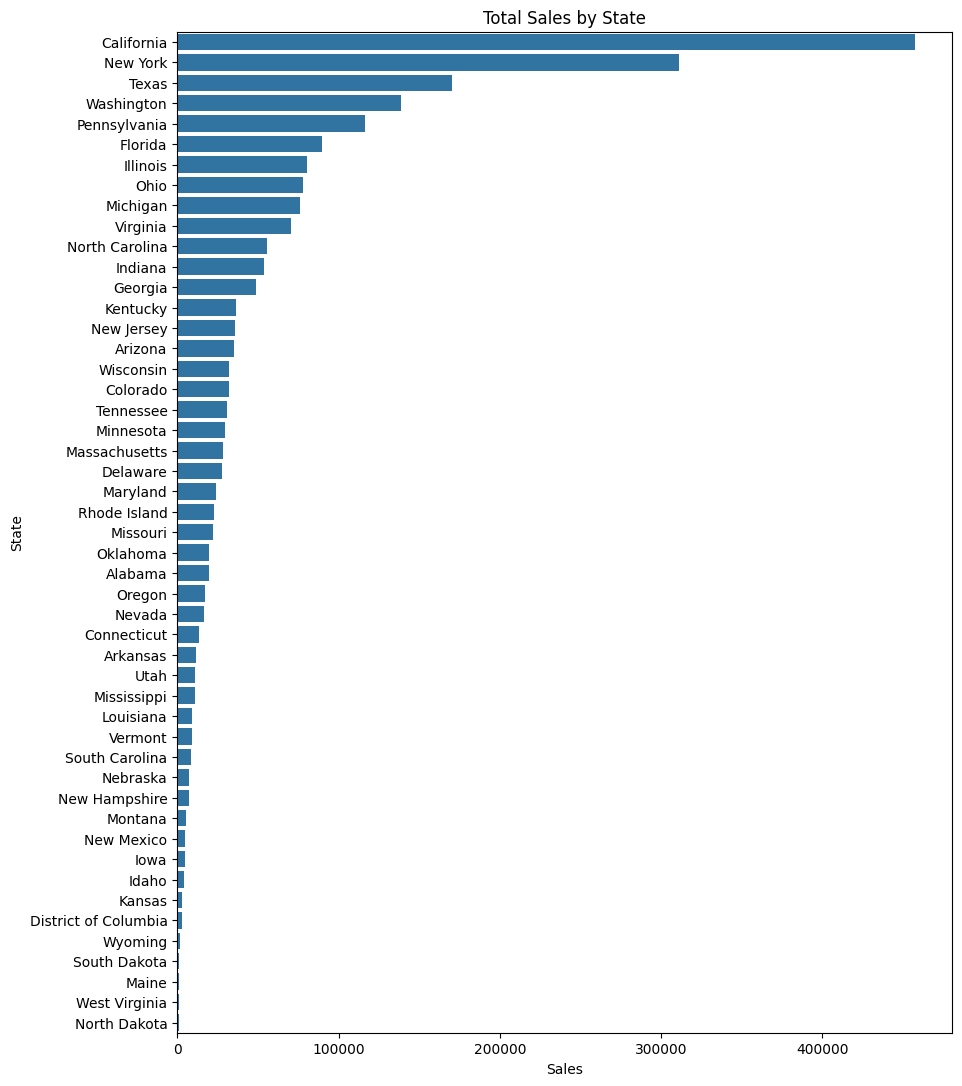

In [40]:
# Sort the DataFrame by the 'Sales' column in descending order
sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=False)

# Create a horizontal bar graph
plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Sales', y='State', data=sum_of_sales, errorbar=None)

plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Total Sales by State')
plt.show()

## Creating a pie chart for category and sub category

In [41]:
import plotly.express as px
# summarize the data by category and sub category
category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
# create a nested pie chart
fig = px.sunburst(category_sales, path=['Category', 'Sub-Category'], values='Sales',
                  color='Sales', color_continuous_scale='RdBu',
                  title='Sales by Category and Sub-Category')
fig.show()